In [1]:
# 1. Importar as bibliotecas necessárias
import pandas as pd       # para manipulação de dados
import numpy as np        # para operações numéricas
import seaborn as sns     # para visualizações mais elaboradas
import matplotlib.pyplot as plt  # para controle fino dos gráficos

In [11]:
# Configurações estéticas dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [12]:
# 2. Carregar os dados diretamente do GitHub (substitua pela sua URL correta)
url = 'https://raw.githubusercontent.com/eng-costa/trilhas-dados/refs/heads/main/Trilhas2B-Desafio4.csv'
df = pd.read_csv(url)

In [15]:
df

,id,pontos,estado,genero,idade,bens,saldo na conta,produtos,possui cartao,ativo,salario anual,saiu
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


In [17]:
# 3. Exibir tamanho inicial do dataset (linhas, colunas)
print("Shape inicial:", df.shape)

Shape inicial: (999, 12)


In [20]:
# 4. Renomear todas as colunas para letras minúsculas
df.columns = df.columns.str.lower()
print("\nColunas após renomeação:", df.columns.tolist())



Colunas após renomeação: ['id', 'pontos', 'estado', 'genero', 'idade', 'bens', 'saldo na conta', 'produtos', 'possui cartao', 'ativo', 'salario anual', 'saiu']


In [21]:
# 5. Identificar colunas categóricas (object ou category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nColunas categóricas:", cat_cols)


Colunas categóricas: ['estado', 'genero']



Contagem de valores únicos em 'estado':
estado
PI    478
CE    258
MA    257
SP      4
RP      1
MG      1
Name: count, dtype: int64


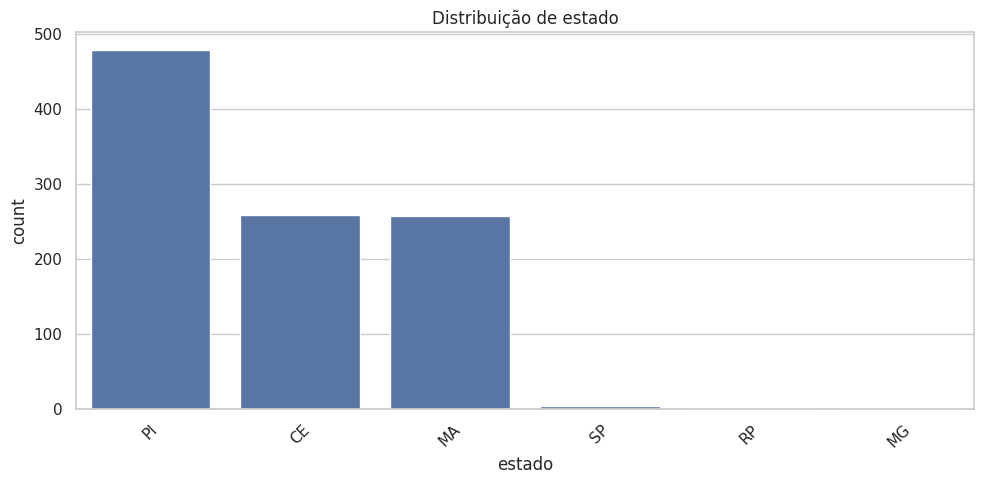


Contagem de valores únicos em 'genero':
genero
Masculino    521
Feminino     461
M              5
F              2
Mas            1
Fem            1
Name: count, dtype: int64


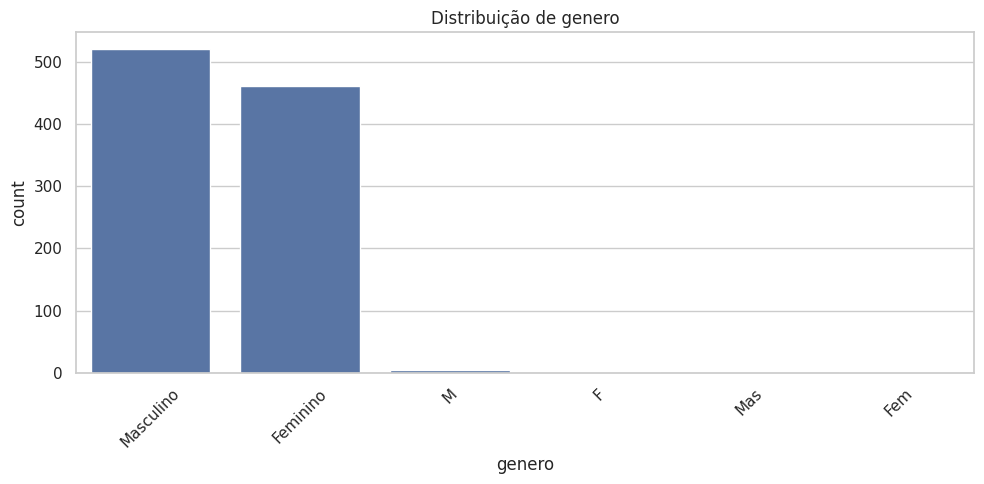

In [23]:
# 6. Explorar cada coluna categórica com contagem e gráfico
for col in cat_cols:
    print(f"\nContagem de valores únicos em '{col}':")
    print(df[col].value_counts())

    # Criar gráfico de barras
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Contagem por estado via groupby():
  estado  count
0     Ce    258
1     Ma    257
2     Mg      1
3     Pi    477
4     Rp      1
5     Sp      4

Percentual por estado via groupby():
  estado        pct
0     Ce  25.851703
1     Ma  25.751503
2     Mg   0.100200
3     Pi  47.795591
4     Rp   0.100200
5     Sp   0.400802


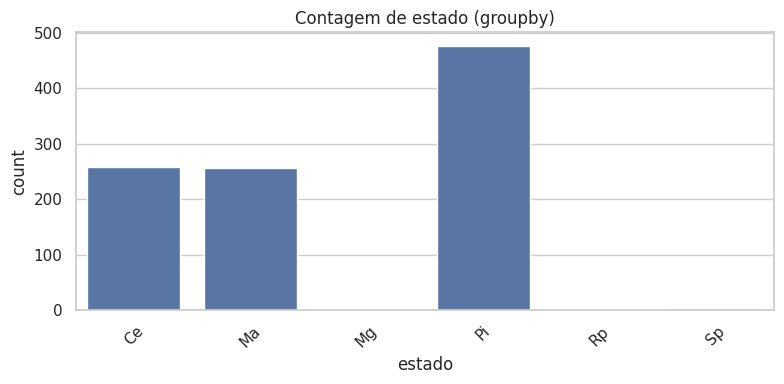

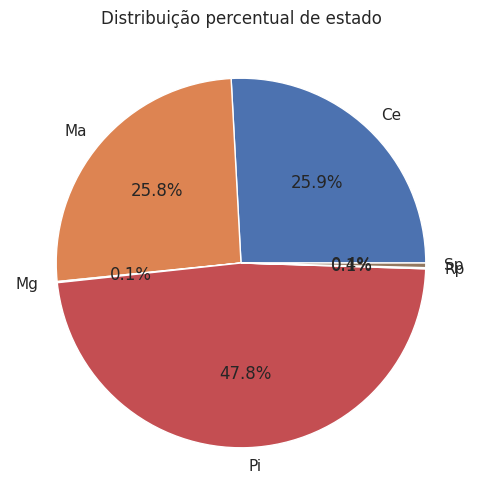


Contagem por genero via groupby():
      genero  count
0   Feminino    463
1  Masculino    535

Percentual por genero via groupby():
      genero        pct
0   Feminino  46.392786
1  Masculino  53.607214


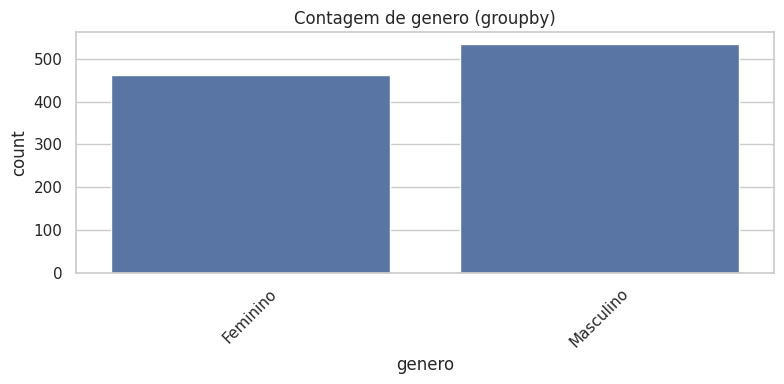

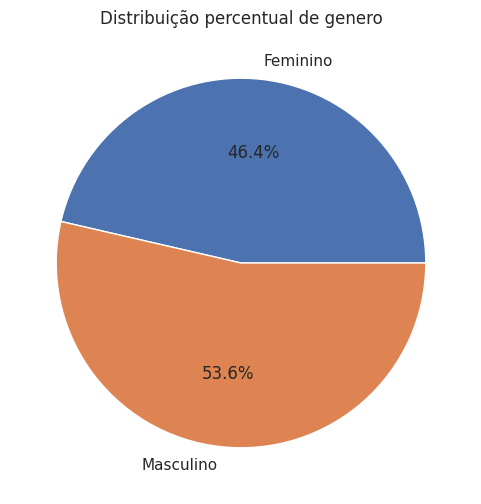

In [55]:
# complemento
for col in cat_cols:
    # 1) Usando groupby() para contar quantos registros existem em cada categoria
    grp_count = df.groupby(col).size().reset_index(name='count')
    print(f"\nContagem por {col} via groupby():")
    print(grp_count)

    # 2) Calculando proporção de cada categoria
    grp_pct = (df.groupby(col).size() / len(df) * 100).reset_index(name='pct')
    print(f"\nPercentual por {col} via groupby():")
    print(grp_pct)

    # 3) Gráfico de barras com seaborn usando o DataFrame agrupado
    plt.figure(figsize=(8,4))
    sns.barplot(data=grp_count, x=col, y='count', order=grp_count[col])
    plt.title(f"Contagem de {col} (groupby)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 4) Gráfico de pizza (opcional) para ver proporções
    plt.figure(figsize=(6,6))
    plt.pie(grp_pct['pct'], labels=grp_pct[col], autopct='%.1f%%')
    plt.title(f"Distribuição percentual de {col}")
    plt.show()

In [24]:
# 7. Identificar colunas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColunas numéricas:", num_cols)


Colunas numéricas: ['id', 'pontos', 'idade', 'bens', 'saldo na conta', 'produtos', 'possui cartao', 'ativo', 'salario anual', 'saiu']


In [25]:
# 8. Exibir estatísticas descritivas das colunas numéricas
print("\nResumo estatístico:")
print(df[num_cols].describe())


Resumo estatístico:
                id      pontos       idade        bens  saldo na conta  \
count   999.000000  999.000000  999.000000  999.000000    9.990000e+02   
mean    500.916917  648.621622   38.902903    5.069069    7.164928e+06   
std     288.662884   98.264219   11.401912    2.927691    6.311840e+06   
min       1.000000  376.000000  -20.000000    0.000000    0.000000e+00   
25%     251.500000  580.000000   32.000000    2.000000    0.000000e+00   
50%     501.000000  653.000000   37.000000    5.000000    8.958835e+06   
75%     750.500000  721.000000   44.000000    8.000000    1.258684e+07   
max    1000.000000  850.000000  140.000000   10.000000    2.117743e+07   

         produtos  possui cartao      ativo  salario anual        saiu  
count  999.000000     999.000000  999.00000   9.920000e+02  999.000000  
mean     1.526527       0.702703    0.50951   3.528762e+07    0.203203  
std      0.574201       0.457297    0.50016   5.305800e+08    0.402584  
min      1.000000   

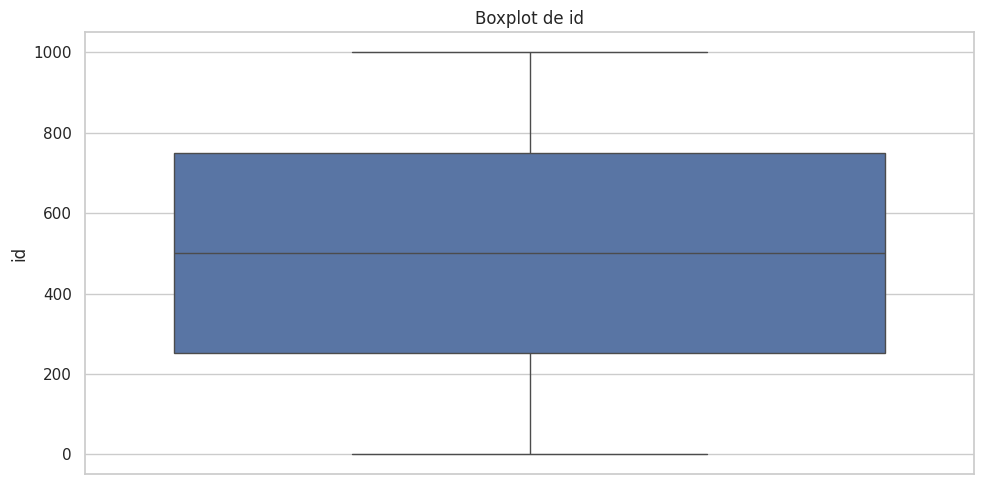

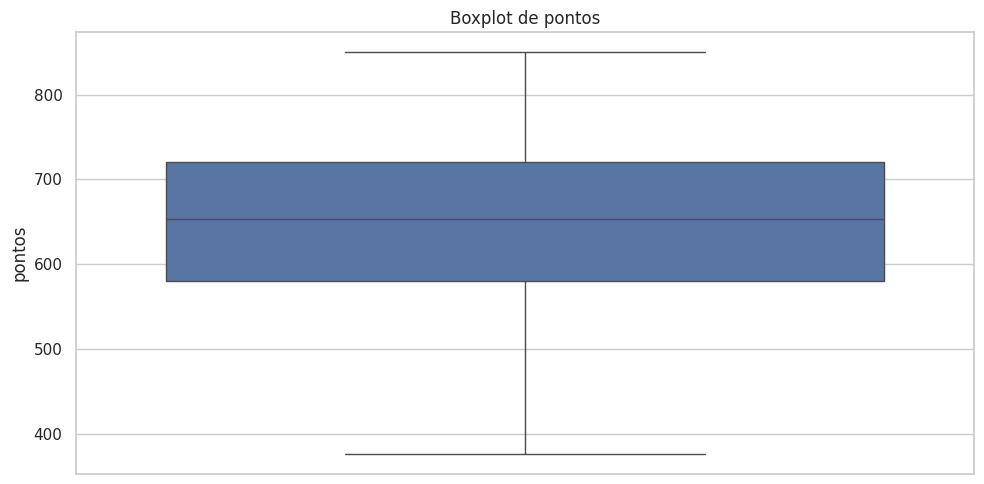

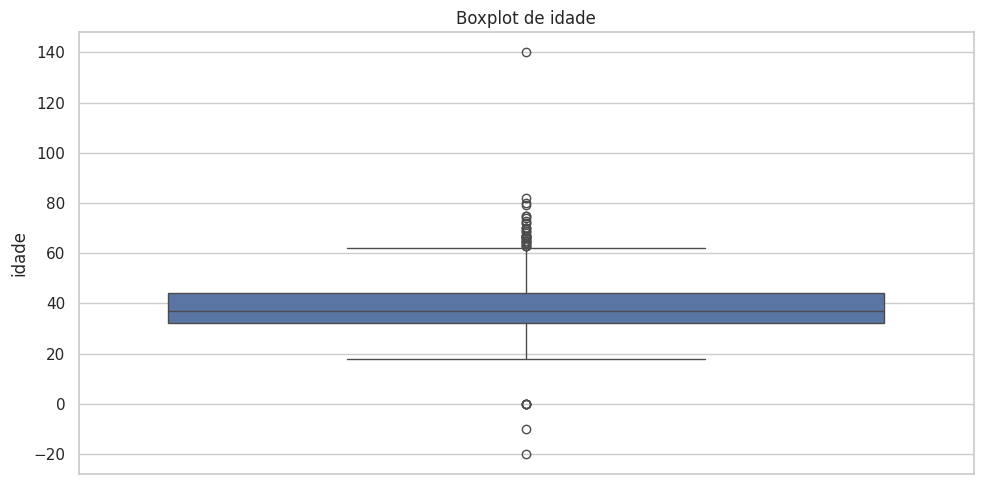

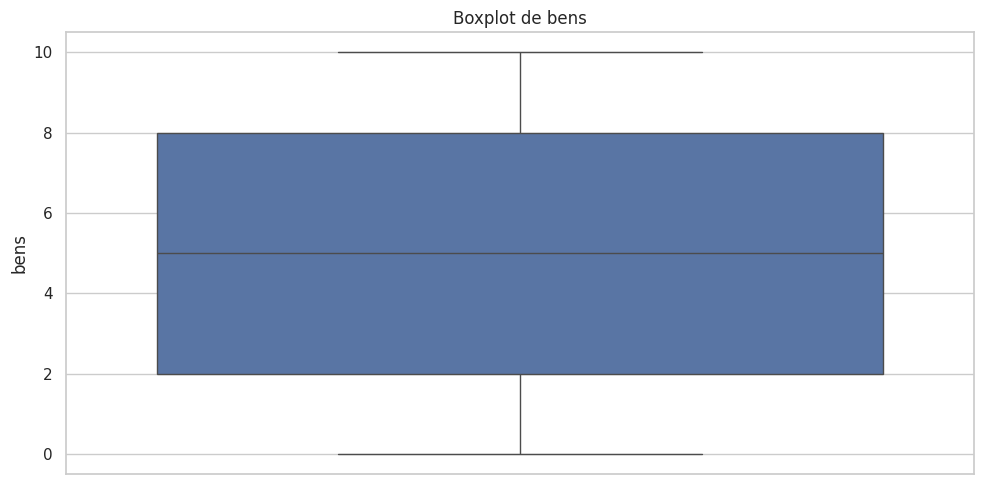

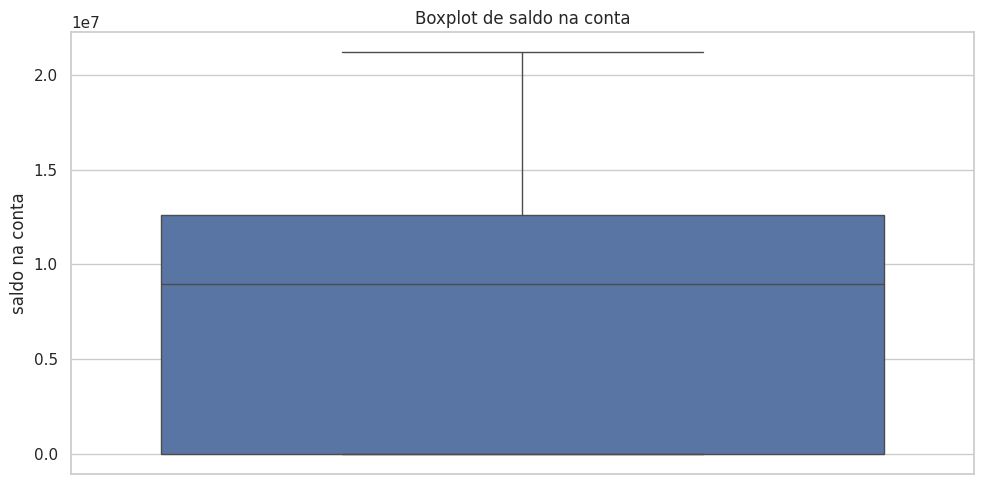

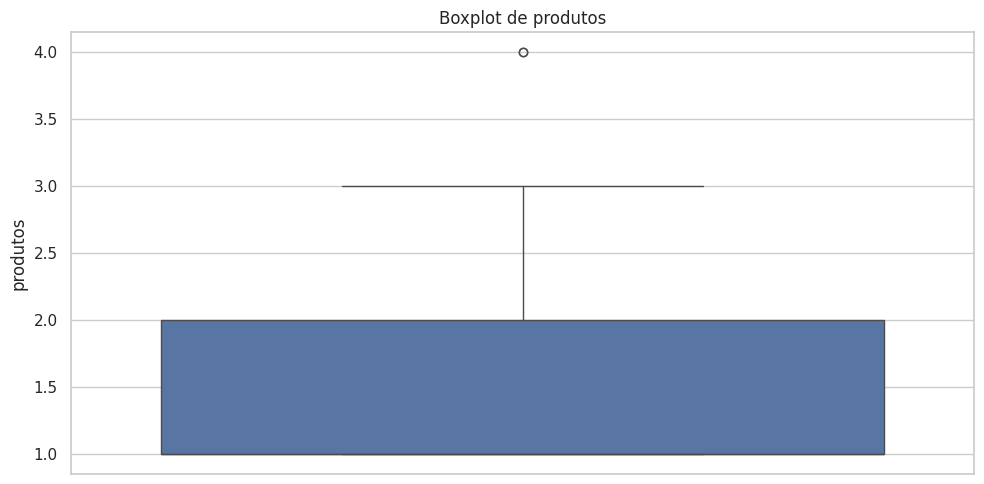

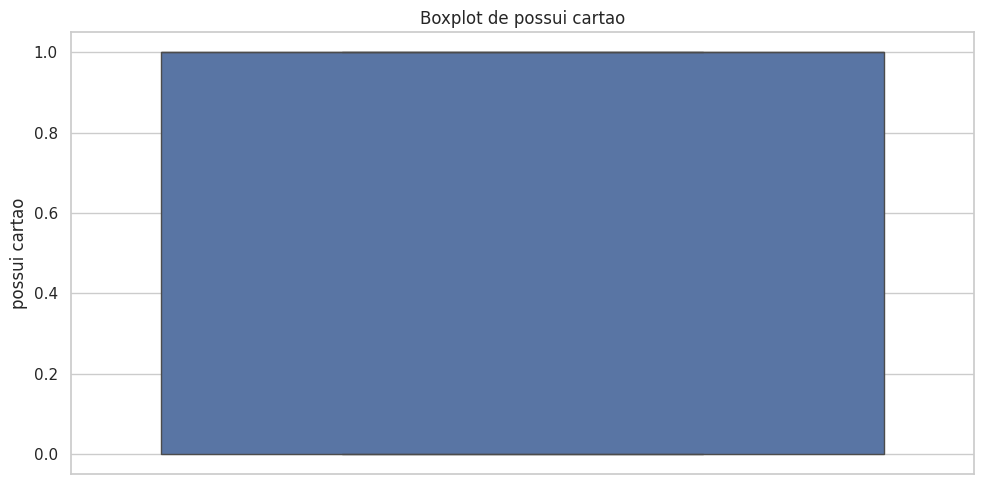

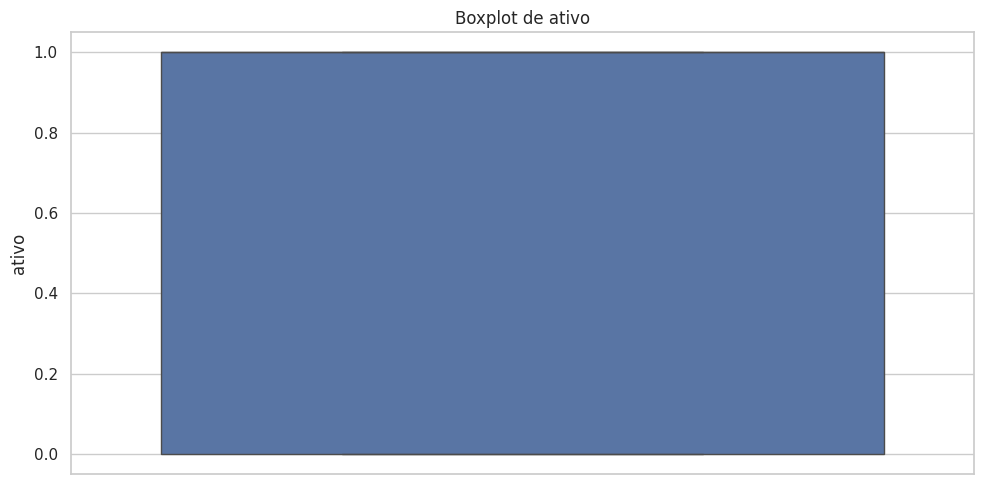

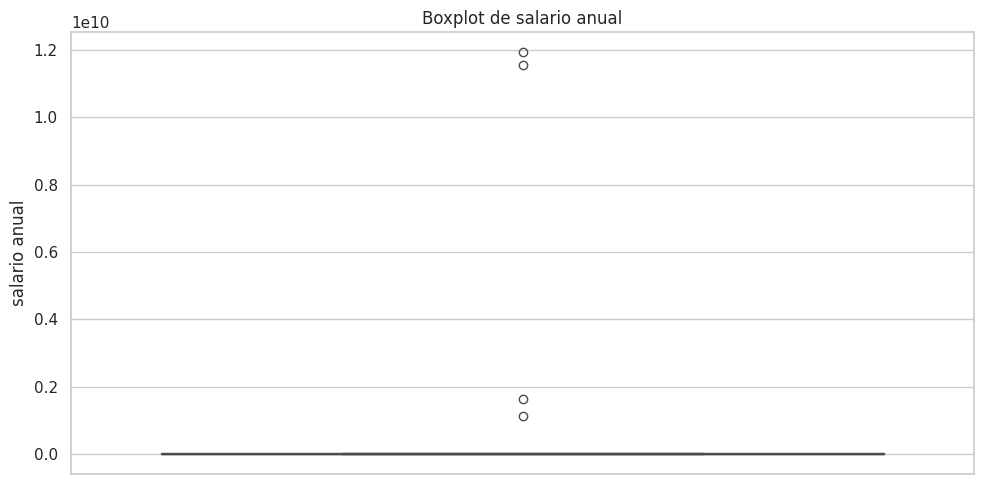

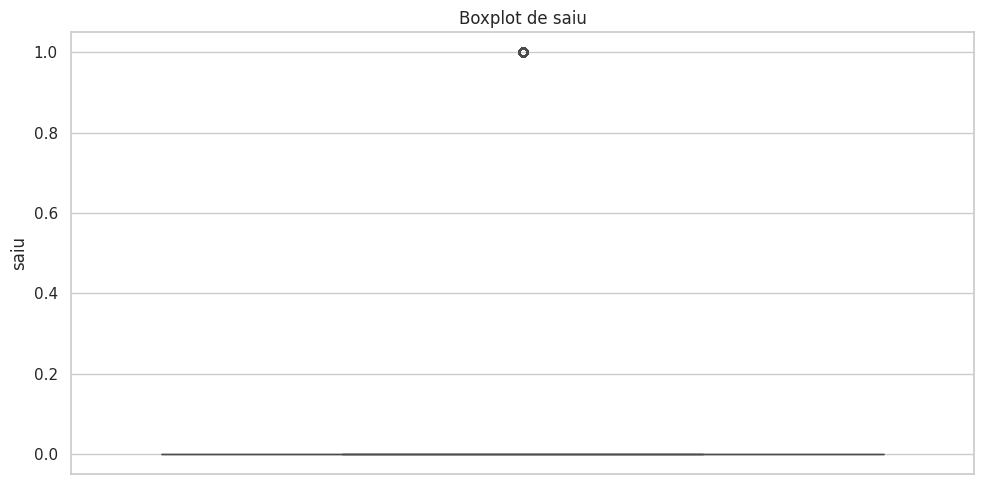

In [26]:
# 9. Visualizar outliers com boxplots
for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

In [29]:
# 10. Tratar dados faltantes (NaNs)
print("\nQuantidade de dados faltantes (NaNs):")
print(df.isnull().sum())




Quantidade de dados faltantes (NaNs):
id                0
pontos            0
estado            0
genero            0
idade             0
bens              0
saldo na conta    0
produtos          0
possui cartao     0
ativo             0
salario anual     0
saiu              0
dtype: int64


In [31]:
# Preencher colunas numéricas com mediana
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [33]:
# Preencher colunas categóricas com o valor mais frequente (moda)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [34]:
print("\nTotal de NaNs após tratamento:", df.isnull().sum().sum())


Total de NaNs após tratamento: 0


In [35]:
# 11. Tratar outliers com técnica de "capping" (IQR)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < limite_inferior, limite_inferior, df[col])
    df[col] = np.where(df[col] > limite_superior, limite_superior, df[col])

print("\nOutliers tratados com técnica de capping.")


Outliers tratados com técnica de capping.


In [36]:
# 12. Remover duplicatas do dataframe
linhas_antes = df.shape[0]
df.drop_duplicates(inplace=True)
linhas_depois = df.shape[0]
print(f"\nDuplicatas removidas: {linhas_antes - linhas_depois}")


Duplicatas removidas: 1


In [37]:

# 13. Padronizar valores de colunas categóricas (ex: genero: "mas" -> "Masculino")
correcoes = {
    'mas': 'Masculino',
    'masc': 'Masculino',
    'm': 'Masculino',
    'fem': 'Feminino',
    'f': 'Feminino'
}

for col in cat_cols:
    df[col] = (
        df[col]
        .astype(str)         # Garante que todos os dados sejam string
        .str.strip()         # Remove espaços
        .str.lower()         # Converte para minúsculas
        .replace(correcoes)  # Aplica mapeamento de correção
        .str.title()         # Converte primeira letra maiúscula (opcional)
    )

print("\nCategorias padronizadas:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Categorias padronizadas:
estado: ['Pi' 'Ce' 'Ma' 'Rp' 'Sp' 'Mg']
genero: ['Feminino' 'Masculino']


In [38]:
# 14. Shape final e pré-visualização
print("\nShape final:", df.shape)
df.head()


Shape final: (998, 12)


,id,pontos,estado,genero,idade,bens,saldo na conta,produtos,possui cartao,ativo,salario anual,saiu
0,1.0,619.0,Pi,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,0.0
1,2.0,608.0,Ce,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3.0,502.0,Pi,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,0.0
3,4.0,699.0,Pi,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5.0,850.0,Ce,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0


In [39]:
# ----------------------------------------------
# 0. Garantir que as colunas de que precisamos
#    estão em minúsculo e sem espaços à direita/esquerda
# ----------------------------------------------
df.columns = df.columns.str.strip().str.lower()

In [40]:
# =================================================
# 1. SALDO NA CONTA — média e mediana < 40 anos
# =================================================
media_menos40  = df.loc[df['idade'] < 40, 'saldo na conta'].mean()
mediana_menos40 = df.loc[df['idade'] < 40, 'saldo na conta'].median()

print(f"Média (saldo)  < 40 anos: {media_menos40:,.2f}")
print(f"Mediana (saldo) < 40 anos: {mediana_menos40:,.2f}\n")


Média (saldo)  < 40 anos: 7,015,427.85
Mediana (saldo) < 40 anos: 8,229,382.00



In [41]:
# =================================================
# 2. SALDO NA CONTA — média e mediana ≥ 40 anos
# =================================================
media_mais40  = df.loc[df['idade'] >= 40, 'saldo na conta'].mean()
mediana_mais40 = df.loc[df['idade'] >= 40, 'saldo na conta'].median()

print(f"Média (saldo)  ≥ 40 anos: {media_mais40:,.2f}")
print(f"Mediana (saldo) ≥ 40 anos: {mediana_mais40:,.2f}\n")

Média (saldo)  ≥ 40 anos: 7,381,265.97
Mediana (saldo) ≥ 40 anos: 9,731,825.00



In [43]:
# =================================================
# 3. SALDO NA CONTA — clientes que saíram vs. permaneceram
#    (assumindo 'saiu' == 1 para saiu e 0 para ficou)
# =================================================
saldo_por_status = (
    df.groupby('saiu')['saldo na conta']
      .agg(media='mean', mediana='median')
      .rename(index={0: 'Permaneceu', 1: 'Saiu'})
)
print("Média e mediana do saldo por status de saída:\n")
print(saldo_por_status, "\n")

Média e mediana do saldo por status de saída:

                   media    mediana
saiu                               
Permaneceu  7.162423e+06  8926348.5 



In [44]:
# =================================================
# 4. PERFIL dos clientes que saíram
# =================================================
left = df.query('saiu == 1').copy()


In [46]:
print(df.columns)

Index(['id', 'pontos', 'estado', 'genero', 'idade', 'bens', 'saldo na conta',
       'produtos', 'possui cartao', 'ativo', 'salario anual', 'saiu'],
      dtype='object')


In [47]:
# 4.1 Gênero predominante entre os clientes que saíram
if left['genero'].dropna().empty:
    print("Nenhum valor disponível na coluna 'genero' entre os clientes que saíram.")
else:
    genero_predominante = left['genero'].mode()[0]
    print(f"Gênero predominante entre os que saíram: {genero_predominante}")


Nenhum valor disponível na coluna 'genero' entre os clientes que saíram.


In [52]:
# Verifica se existem dados válidos antes de calcular estatísticas
campos = ['idade', 'saldo na conta', 'bens']
if left[campos].dropna(how='all').empty:
    print("\n Nenhuma informação disponível para calcular estatísticas entre os que saíram.")
else:
    age_stats   = left['idade'].agg(['mean', 'median'])
    saldo_stats = left['saldo na conta'].agg(['mean', 'median'])
    bens_stats  = left['bens'].agg(['mean', 'median'])

    print("\n--- Estatísticas entre os que saíram ---")
    print(f"Idade   - média: {age_stats['mean']:.1f} | mediana: {age_stats['median']}")
    print(f"Saldo   - média: {saldo_stats['mean']:,.2f} | mediana: {saldo_stats['median']:,.2f}")
    print(f"Bens    - média: {bens_stats['mean']:,.2f} | mediana: {bens_stats['median']:,.2f}")



 Nenhuma informação disponível para calcular estatísticas entre os que saíram.


In [54]:
# 4.3 Distribuição por estado
if left['estado'].dropna().empty:
    print("\n Nenhum dado de 'estado' disponível entre os clientes que saíram.")
else:
    estado_counts = left['estado'].value_counts()
    print("\nClientes que saíram por estado:")
    print(estado_counts)



 Nenhum dado de 'estado' disponível entre os clientes que saíram.
